# Loan Prediction

# Importing the required libraries

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data files

In [274]:
train=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [275]:
test=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


# List of column names

In [276]:
list(train)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

# Summary statistics

In [277]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [278]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


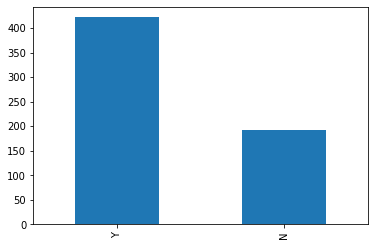

In [266]:
train['Loan_Status'].value_counts().plot.bar()

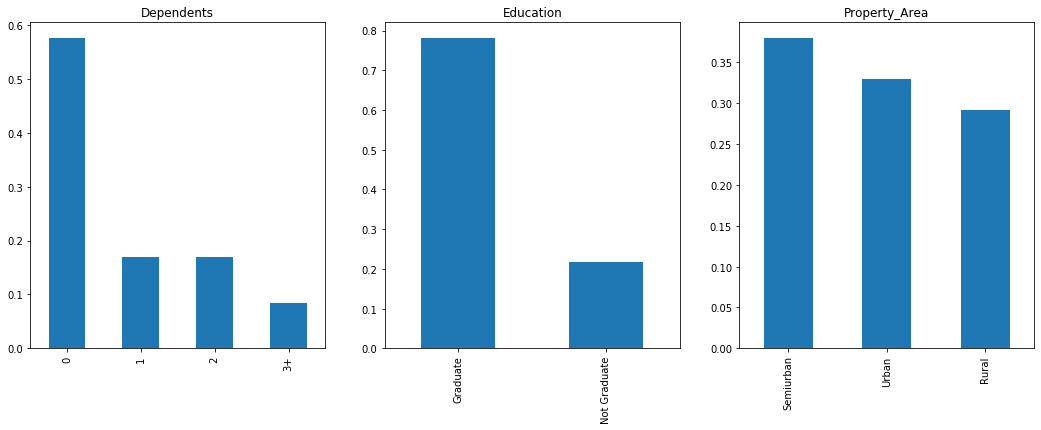

In [267]:
plt.figure(1)
plt.subplot(1,3,1)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(18,6), title= 'Dependents')

plt.subplot(1,3,2)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(1,3,3)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

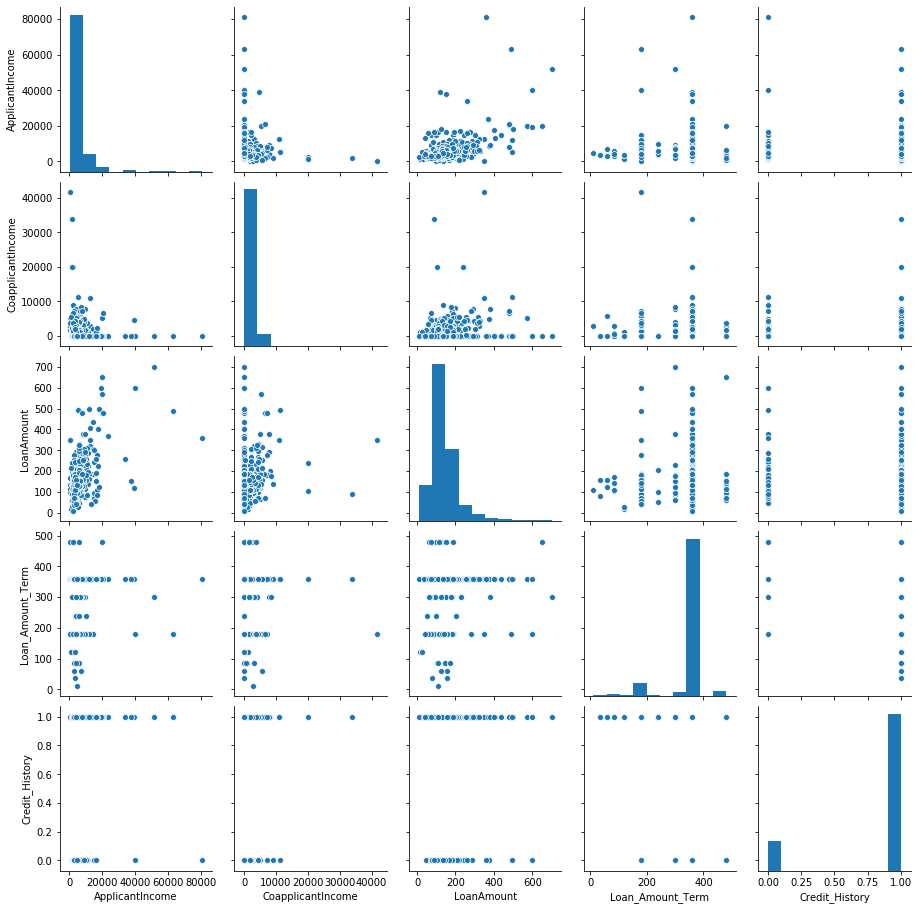

In [203]:
import seaborn as sns
sns.pairplot(train)

# DATA CLEANING AND PREPROCESSING

In [234]:
#Find missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [233]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# Imputing missing values with mean for numerical variables

In [235]:
train.fillna(train.mean(),inplace=True) 
train.isnull().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [270]:
#Test data
test.fillna(test.mean(),inplace=True) 
test.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

# Impute missing values with mode for categorical variables

In [271]:
train.Gender.fillna(train.Gender.mode()[0],inplace=True)
train.Married.fillna(train.Married.mode()[0],inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0],inplace=True) 
train.Self_Employed.fillna(train.Self_Employed.mode()[0],inplace=True)  
train.isnull().sum() 

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [272]:
#Test data
test.Gender.fillna(test.Gender.mode()[0],inplace=True)
test.Dependents.fillna(test.Dependents.mode()[0],inplace=True) 
test.Self_Employed.fillna(test.Self_Employed.mode()[0],inplace=True)  
test.isnull().sum() 

AttributeError: 'DataFrame' object has no attribute 'Gender'

# To removeoutliers

In [242]:
train.Loan_Amount_Term=np.log(train.Loan_Amount_Term)

# Remove Loan_ID variable - Irrelevant

In [243]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

# Assigning x and y

In [244]:
X=train.drop('Loan_Status',1)
y=train.Loan_Status

# Build dummy variables for categorical variables

In [245]:
# converting categorical variables into numerical values
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

# Split into train and test data

In [246]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# LOGISTIC REGRESSION ALGORITHM

In [247]:
#Fit model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

#Predict values for cv data
pred_cv=model.predict(x_test)

#Evaluate accuracy of model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("accuracy_score= ", accuracy_score(y_test,pred_cv))
      
matrix=confusion_matrix(y_test,pred_cv)
print(matrix)

accuracy_score=  0.7967479674796748
[[15 20]
 [ 5 83]]


C:\Users\richk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [248]:
from sklearn import metrics
print(metrics.classification_report(y_test, pred_cv))

              precision    recall  f1-score   support

           N       0.75      0.43      0.55        35
           Y       0.81      0.94      0.87        88

    accuracy                           0.80       123
   macro avg       0.78      0.69      0.71       123
weighted avg       0.79      0.80      0.78       123



# RANDOM FOREST ALGORITHM

In [249]:
#Fit model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

#Predict values for cv data
pred_cv2=rf.predict(x_test)

#Evaluate accuracy of model
print("accuracy_score= ", accuracy_score(y_test,pred_cv2))
matrix2=confusion_matrix(y_test,pred_cv2)
print(matrix2)

accuracy_score=  0.7886178861788617
[[16 19]
 [ 7 81]]


In [250]:
print(metrics.classification_report(y_test, pred_cv2))

              precision    recall  f1-score   support

           N       0.70      0.46      0.55        35
           Y       0.81      0.92      0.86        88

    accuracy                           0.79       123
   macro avg       0.75      0.69      0.71       123
weighted avg       0.78      0.79      0.77       123



# DECISION TREE ALGORITHM

In [255]:
#Fit model
from sklearn import tree
dt=tree.DecisionTreeClassifier(criterion='gini')
dt.fit(x_train,y_train)

#Predict values for cv data
pred_cv1=dt.predict(x_test)

#Evaluate accuracy of model
print("accuracy_score= ", accuracy_score(y_test,pred_cv1))
matrix1=confusion_matrix(y_test,pred_cv1)
print(matrix1)

accuracy_score=  0.6747967479674797
[[20 15]
 [25 63]]


In [256]:
print(metrics.classification_report(y_test, pred_cv2))

              precision    recall  f1-score   support

           N       0.70      0.46      0.55        35
           Y       0.81      0.92      0.86        88

    accuracy                           0.79       123
   macro avg       0.75      0.69      0.71       123
weighted avg       0.78      0.79      0.77       123



# SUPPORT VECTOR MACHINE (SVM) ALGORITHM

In [257]:
from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(x_train,y_train)

#Predict values for cv data
pred_cv3=svm_model.predict(x_test)

#Evaluate accuracy of model
print("accuracy_score= ", accuracy_score(y_test,pred_cv3)) #64.23%
matrix3=confusion_matrix(y_test,pred_cv3)
print(matrix3)

accuracy_score=  0.7154471544715447
[[ 0 35]
 [ 0 88]]


In [258]:
print(metrics.classification_report(y_test, pred_cv2))

              precision    recall  f1-score   support

           N       0.70      0.46      0.55        35
           Y       0.81      0.92      0.86        88

    accuracy                           0.79       123
   macro avg       0.75      0.69      0.71       123
weighted avg       0.78      0.79      0.77       123

